# How well do jobs and skills pay for Data Analysts?
## Methodology
1. 1Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills
### Import Libraries and Data

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import ast
import matplotlib.ticker as ticker
import seaborn as sns

df = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Python_Data_Analytics_Course\\CSVs\\data_jobs.csv")
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills)

1. Salary Distribution by Job Title

In [7]:
df_US = df[df['job_country'] == 'United States']

In [8]:
job_titles = df_US['job_title_short'].value_counts().sort_values(ascending=False).head(7).index.to_list()

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Business Analyst']

In [9]:
df_DATA_roles = df_US[df_US['job_title_short'].isin(job_titles)]

df_DATA_roles_B = (df_DATA_roles
                 .groupby('job_title_short')['salary_year_avg']
                 .median()
                 .reset_index()
                 .sort_values(by="salary_year_avg",ascending=False)
)

df_DATA_roles_B

,job_title_short,salary_year_avg
6,Senior Data Scientist,155000.0
5,Senior Data Engineer,150000.0
3,Data Scientist,130000.0
2,Data Engineer,125000.0
4,Senior Data Analyst,110000.0
1,Data Analyst,90000.0
0,Business Analyst,90000.0


2. Plot Salary Distributions

array([0.17363177, 0.19076859, 0.44549087, 1.        ])

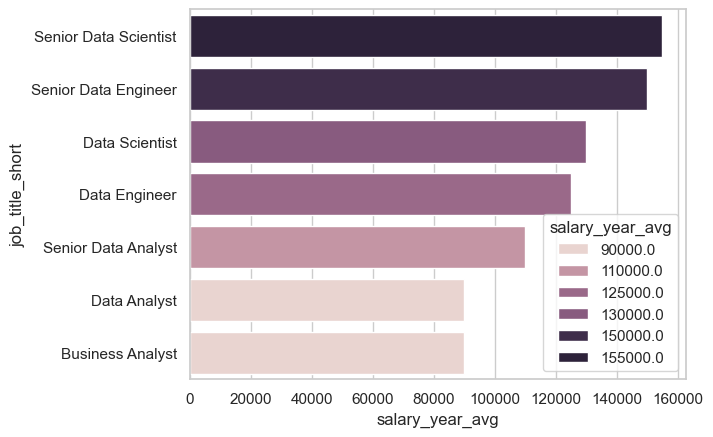

In [10]:
sns.set_theme(style='whitegrid')

sns.barplot(data=df_DATA_roles_B,
              x='salary_year_avg',
              y='job_title_short',
              hue='salary_year_avg',
              )
sns.color_palette("crest", as_cmap=True).get_over()


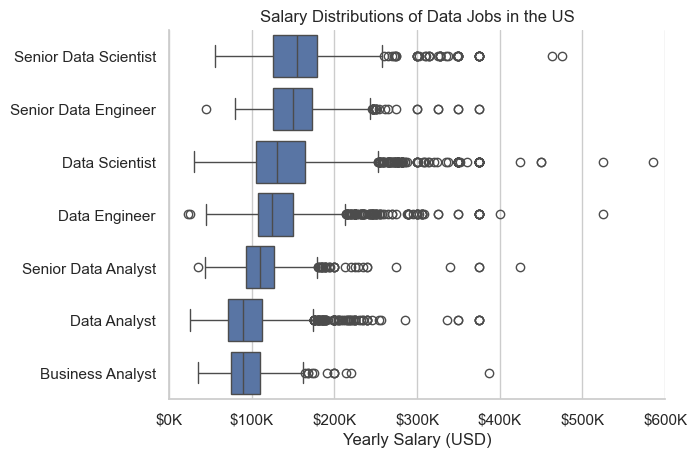

In [11]:
sns.boxplot(
	data=df_DATA_roles,
	x='salary_year_avg',
	y='job_title_short',
	order=df_DATA_roles_B['job_title_short']  # Use the list of job titles for ordering
)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

3. Investigate Median Salary Vs Skill for Data Analysts

In [12]:
df_DA_US = df_US[df_US['job_title_short'] == 'Data Analyst']

df_DA_US_skills = (df_DA_US.explode('job_skills')
                   .groupby('job_skills')['salary_year_avg']
                   .agg(['count' , 'median'])
                   .reset_index()
                   )

df_DA_US_skills

,job_skills,count,median
0,airflow,44,116250.00
1,airtable,5,90000.00
2,alteryx,106,106281.25
3,angular,8,107500.00
4,ansible,1,159640.00
...,...,...,...
213,workfront,3,75000.00
214,wrike,1,75000.00
215,xamarin,0,NaN
216,yarn,0,NaN


4. Determine The Highest Paid Skills and Most Demanded Skills and plot theme.

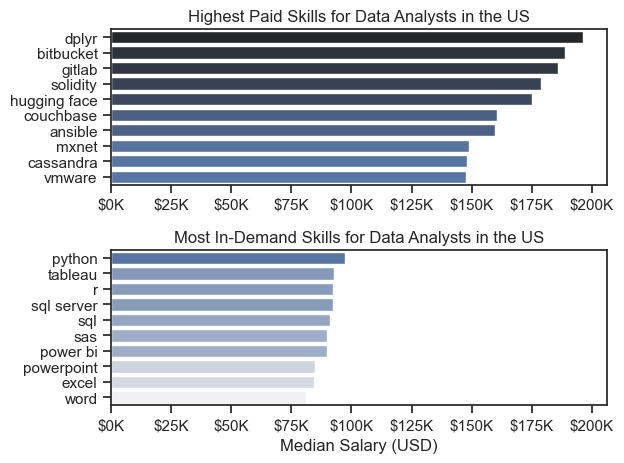

In [13]:
df_DA_US_skills_most_paid = df_DA_US_skills.sort_values(by='median', ascending=False).head(10)

df_DA_US_skills_most_demanded = df_DA_US_skills.sort_values(by='count', ascending=False).head(10)

job_order = df_DA_US_skills_most_demanded.sort_values(by='median',ascending=False)

job_order = job_order['job_skills'].tolist()


fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_US_skills_most_paid, x='median', y='job_skills', hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_US_skills_most_demanded, x='median', y='job_skills', hue='median', ax=ax[1], palette='light:b', order=job_order)
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()